# LME mask for data extractions
Mask file provided by Julia as a netcdf file.

## Importing relevant libraries

In [80]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## Accessing file with mask information

In [54]:
#Loading as dataset
mask = xr.open_dataset("../data/fishMIP_regional_mask_ISIMIP3.nc")

#Checking structure of dataset
mask

<xarray.Dataset>
Dimensions:       (nlat: 180, nlon: 360)
Dimensions without coordinates: nlat, nlon
Data variables:
    lat           (nlat) float32 ...
    lon           (nlon) float32 ...
    fishMIP_MASK  (nlat, nlon) float32 ...
Attributes:
    author:        Created by Ryan Heneghan <ryan.heneghan@gmail.com>
    institution:   Queensland University of Technology
    date_created:  Fri Aug  7 17:16:31 2020
    comments:      Spatial mask for regional variable extraction. Coded as 1:...

The `comments` attribute seen above includes the key used when the mask was created. We will use this information to create a dictionary so we can create a multidimensional mask.

In [48]:
#Dictionary
LME_keys = {1: "Humboldt", 2: "North Sea", 3: "Mediterranean", 4: "Baltic Sea", 5: "SE_Australia", 6: "East Bass Strait", \
    7: "Cook Strait", 8: "Hawaiian long line", 9: "Benguela", 10: "EBS Shelf"}

#Check results
LME_keys

{1: 'Humboldt',
 2: 'North Sea',
 3: 'Mediterranean',
 4: 'Baltic Sea',
 5: 'SE_Australia',
 6: 'East Bass Strait',
 7: 'Cook Strait',
 8: 'Hawaiian long line',
 9: 'Benguela',
 10: 'EBS Shelf'}

We will now plot the data to make sure the values in the attributes were correct.

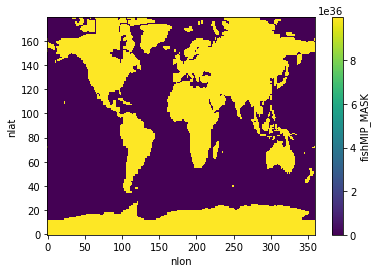

In [55]:
mask.fishMIP_MASK.plot()

The mask is using a `NO DATA` value instead of `NA`. We will fix this before creating the multidimensional mask.

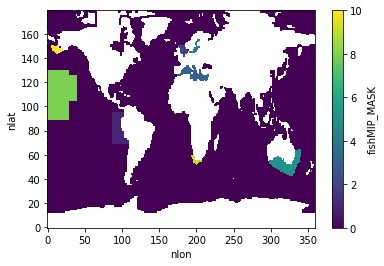

In [56]:
#Covering land areas
mask_no_land = xr.where(mask.fishMIP_MASK > 11, np.nan, mask.fishMIP_MASK)

#Plotting results
mask_no_land.plot()

We will now use the `LME_keys` dictionary to create our mask.

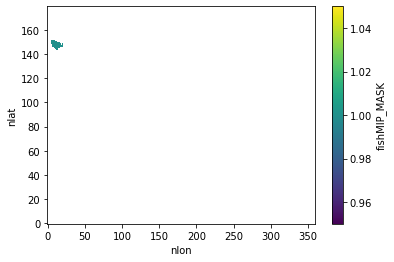

In [91]:
xr.where(mask_no_land == lme, True, np.nan).plot()

In [92]:
#Create an empty dictionary
LME_mask = []

#Loop through each dictionary entry
for lme in LME_keys:
    #Getting name of LME
    name = LME_keys[lme]
    #Adding dimension with LME name
    LME_mask.append(xr.where(mask_no_land == lme, True, np.nan).expand_dims(LME_name = [name]))

#Creating multidimensional dataset
LME_mask = xr.concat(LME_mask, dim = 'LME_name')

#Check results
LME_mask

<xarray.DataArray 'fishMIP_MASK' (LME_name: 10, nlat: 180, nlon: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * LME_name  (LME_name) object 'Humboldt' 'North Sea' ... 'EBS Shelf'
Dimensions without coordinates: nlat, nlon

Plotting the multidimensional mask

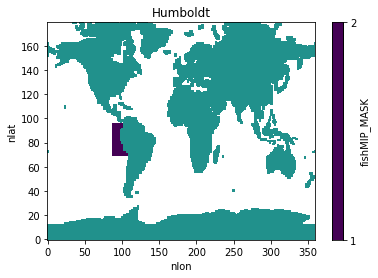

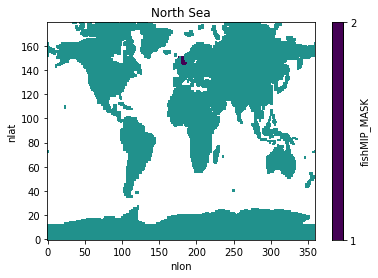

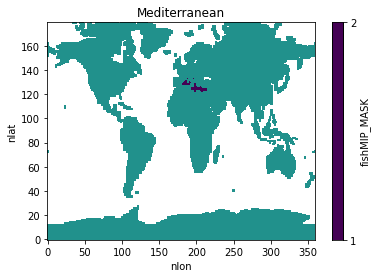

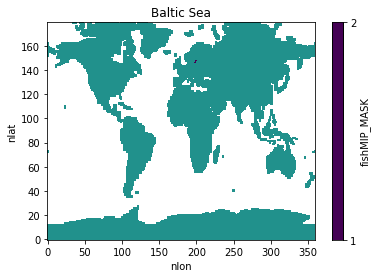

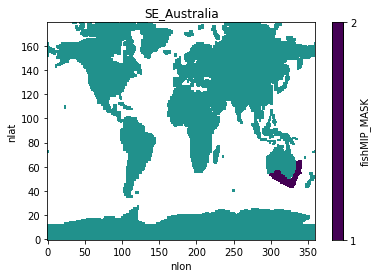

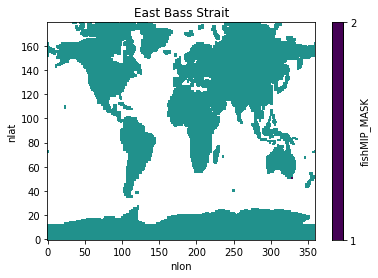

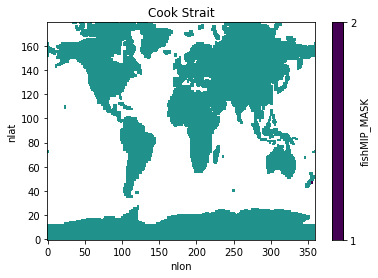

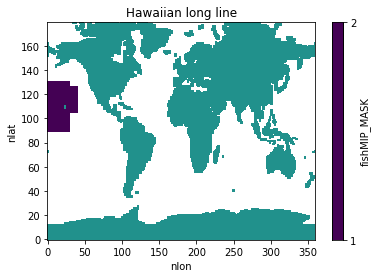

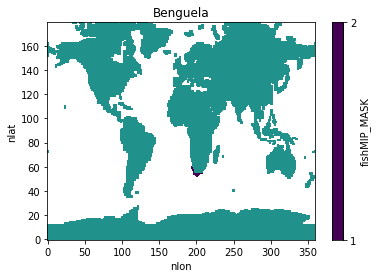

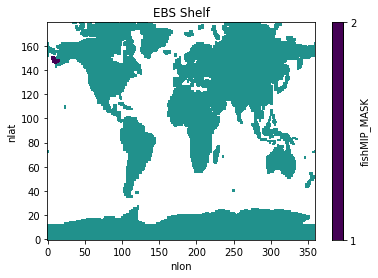

In [110]:
#Creating a mask for land areas
land = xr.where(mask.fishMIP_MASK > 11, 10, np.nan)

for lme in LME_keys:
    #Plotting results
    fig = plt.figure()
    ax = fig.add_subplot(111)
    name = LME_keys[lme]

    LME_mask.sel(LME_name = name).plot(ax = ax, levels = [1, 2])
    land.plot(ax = ax, add_colorbar = False)
    plt.title(name)

## Saving the mask to disk

In [111]:
LME_mask.to_netcdf("../data/fishMIP_regional_mask_ISIMIP3_multi.nc")